<a href="https://colab.research.google.com/github/shelly-serafimovich/Law-and-Ethics-Project/blob/main/Law_%26_Ethics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imports

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

In [2]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import pandas as pd
from transformers import BartForConditionalGeneration, BartTokenizer
from datasets import load_dataset
import torch

Data

In [3]:
ds = load_dataset("metaeval/ethics", "commonsense")

# Convert each split of the dataset to a pandas DataFrame
train_df = ds['train'].to_pandas()
test_df = ds['test'].to_pandas()
validation_df = ds['validation'].to_pandas()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/13910 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3885 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3964 [00:00<?, ? examples/s]

Model

In [4]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("sileod/deberta-v3-small-tasksource-nli")
model = AutoModelForSequenceClassification.from_pretrained("sileod/deberta-v3-small-tasksource-nli")

tokenizer_config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/568M [00:00<?, ?B/s]

## Model Usage

In [5]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# Define the text you want to classify and the candidate labels
pipe = pipeline("zero-shot-classification", model="sileod/deberta-v3-small-tasksource-nli")

text = "I want to have an abortion"
candidate_labels = ["acceptable", "unacceptable"]

# Perform classification
results = pipe(text, candidate_labels=candidate_labels)

print(results)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'sequence': 'I want to have an abortion', 'labels': ['acceptable', 'unacceptable'], 'scores': [0.5405751466751099, 0.45942485332489014]}


In [10]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score

# Sample the data
sampled_data = test_df.sample(n=100, random_state=42)
test_texts = sampled_data['text'].tolist()
test_labels = sampled_data['label'].tolist()

# Initialize the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("sileod/deberta-v3-small-tasksource-nli")
model = AutoModelForSequenceClassification.from_pretrained("sileod/deberta-v3-small-tasksource-nli")
model.eval()

predictions = []

with torch.no_grad():
    for text, label in zip(test_texts, test_labels):
        # Tokenize the text
        encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

        # Get the input IDs and ignore the attention mask
        input_ids = encoded_input['input_ids']

        # Compute the model output directly using input IDs
        outputs = model(input_ids)

        # Get the prediction
        batch_prediction = torch.argmax(outputs.logits, dim=-1)
        predictions.append(batch_prediction.item())

accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Accuracy: 0.44


## analysis

train set analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


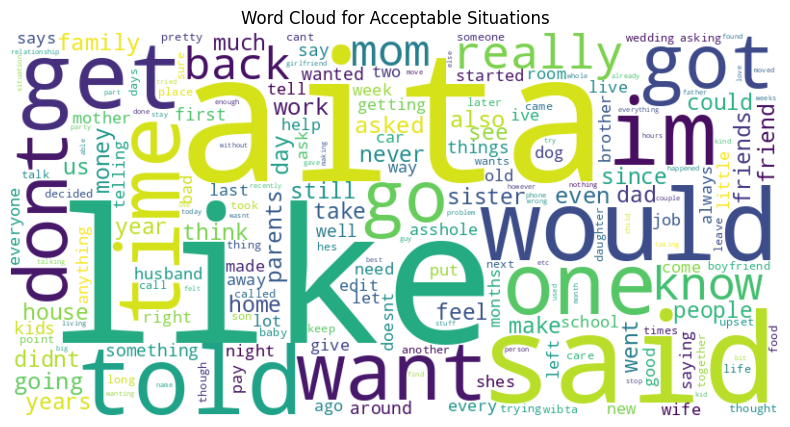

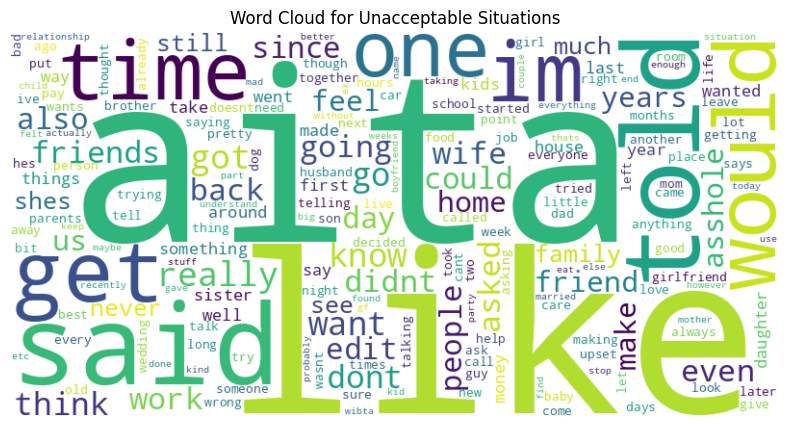

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import string
from collections import Counter
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = text.split()
    # Remove stopwords and non-alphabetic words
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return words

# Apply preprocessing to each text entry and separate by label
acceptable_words = []
unacceptable_words = []

for _, row in train_df.iterrows():
    if row['label'] == 0:
        acceptable_words.extend(preprocess_text(row['text']))
    else:
        unacceptable_words.extend(preprocess_text(row['text']))

# Generate word frequency distributions
acceptable_word_freq = Counter(acceptable_words)
unacceptable_word_freq = Counter(unacceptable_words)

# Function to generate a word cloud
def generate_word_cloud(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for both categories
generate_word_cloud(acceptable_word_freq, "Word Cloud for Acceptable Situations")
generate_word_cloud(unacceptable_word_freq, "Word Cloud for Unacceptable Situations")

In [ ]:
import pandas as pd
from collections import Counter


# Define a set of positive and negative words
positive_words = set(["happy", "good", "great", "positive", "fortunate", "correct", "superior", "love"])
negative_words = set(["sad", "bad", "terrible", "negative", "unfortunate", "wrong", "inferior", "hate"])

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = text.split()
    # Filter out stopwords and non-alphabetic words
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Function to calculate basic sentiment scores
def basic_sentiment_analysis(texts):
    sentiment_scores = []
    for text in texts:
        tokens = preprocess_text(text)
        score = 0
        for word in tokens:
            if word in positive_words:
                score += 1
            elif word in negative_words:
                score -= 1
        sentiment_scores.append(score)
    return sum(sentiment_scores) / len(sentiment_scores)

# Separate texts by label
acceptable_texts = train_df[train_df['label'] == 0]['text']
unacceptable_texts = train_df[train_df['label'] == 1]['text']

# Compute sentiment scores for each category
basic_acceptable_sentiment = basic_sentiment_analysis(acceptable_texts)
basic_unacceptable_sentiment = basic_sentiment_analysis(unacceptable_texts)

# Output the results
print("Average Sentiment for Acceptable Situations:", basic_acceptable_sentiment)
print("Average Sentiment for Unacceptable Situations:", basic_unacceptable_sentiment)

Average Sentiment for Acceptable Situations: 0.1069348861831657
Average Sentiment for Unacceptable Situations: 0.13251495121183507


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure that you have downloaded the necessary NLTK resources
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to compute average sentiment scores
def compute_average_polarity(texts):
    total_polarity = 0
    for text in texts:
        scores = sia.polarity_scores(text)
        total_polarity += scores['compound']  # 'compound' gives the overall sentiment polarity score
    average_polarity = total_polarity / len(texts)
    return average_polarity

# Compute the average polarity for each category
average_polarity_acceptable = compute_average_polarity(acceptable_texts)
average_polarity_unacceptable = compute_average_polarity(unacceptable_texts)

# Print the results
print("Average Polarity for Acceptable Situations:", average_polarity_acceptable)
print("Average Polarity for Unacceptable Situations:", average_polarity_unacceptable)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Polarity for Acceptable Situations: 0.05317349126521962
Average Polarity for Unacceptable Situations: 0.07591532892666054


In [ ]:
unacceptable_texts[0]

"I went to the principal's office to change my records before going to a different school."

Visulize the subjects

In [ ]:
!pip install spacy


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
import spacy
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')


texts = train_df['text'].tolist()  # Adjust column name as necessary

# # Define stopwords list
# stop_words = set(stopwords.words('english'))

# # Preprocess texts: tokenize, remove stopwords and punctuation
# def preprocess_text(text):
#     tokens = word_tokenize(text.lower())
#     tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
#     return tokens

# tokenized_texts = [preprocess_text(text) for text in texts]


# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Preprocess texts using NER
def preprocess_text_with_ner(text):
    doc = nlp(text)
    tokens = [ent.text for ent in doc.ents]  # Keeping only entity text
    return tokens

tokenized_texts = [preprocess_text_with_ner(text) for text in texts]

# Train a Word2Vec model
model_w2v = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Generate embeddings for each text by averaging word vectors
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model_w2v.wv.index_to_key]
    return np.mean(model_w2v.wv[doc], axis=0) if doc else np.zeros(model_w2v.vector_size)

embeddings = np.array([document_vector(text) for text in tokenized_texts])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13910 samples in 0.001s...
[t-SNE] Computed neighbors for 13910 samples in 3.226s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13910
[t-SNE] Computed conditional probabilities for sample 2000 / 13910
[t-SNE] Computed conditional probabilities for sample 3000 / 13910
[t-SNE] Computed conditional probabilities for sample 4000 / 13910
[t-SNE] Computed conditional probabilities for sample 5000 / 13910
[t-SNE] Computed conditional probabilities for sample 6000 / 13910
[t-SNE] Computed conditional probabilities for sample 7000 / 13910
[t-SNE] Computed conditional probabilities for sample 8000 / 13910
[t-SNE] Computed conditional probabilities for sample 9000 / 13910
[t-SNE] Computed conditional probabilities for sample 10000 / 13910
[t-SNE] Computed conditional probabilities for sample 11000 / 13910
[t-SNE] Computed conditional probabilities for sample 12000 / 13910
[t-SNE] Computed conditional probabilities for sam

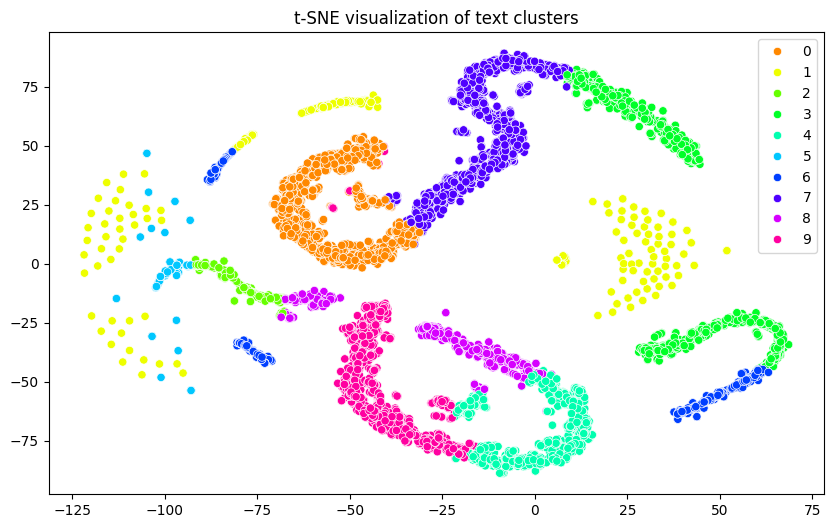

Representative words for each cluster: ['AITA', 'a month', 'AITA', 'WIBTA', 'AITA', 'AITA', 'WIBTA', 'AITA', 'AITA', 'AITA']


In [ ]:
from sklearn.cluster import KMeans

# Number of clusters
k = 10
kmeans = KMeans(n_clusters=k, random_state=0).fit(embeddings)

# Get cluster labels
labels = kmeans.labels_


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# t-SNE transformation
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, init='pca')
tsne_results = tsne_model.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=labels, palette=sns.color_palette("hsv", k), legend='full')
plt.title('t-SNE visualization of text clusters')
plt.show()

# Compute centroids for each cluster
centroids = np.array([embeddings[labels == i].mean(axis=0) for i in range(k)])

# Find closest word in embedding space to each centroid
closest_words = [model_w2v.wv.most_similar([centroid], topn=1)[0][0] for centroid in centroids]
print("Representative words for each cluster:", closest_words)



תשתמשי ב NER